In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
colors = """Astro	#6FF17D
ChC	#004EE3
Endo	#60C200
L2/3 IT	#FF6FEB
L4/5 IT	#F15A98
L5 ET	#EE7E94
L5 IT	#FA9E8B
L5/6 NP	#F24799
L6 CT	#EB9863
L6 IT	#EAACD3
L6 IT CAR3	#FF7F00
L6b	#FFAC3B
LAMP5	#3E9DDF
MGC	#70AD47
ODC	#ACF068
OPC	#C3D740
PVALB	#87B9DD
SNCG	#6167E1
SST	#684CE3
VIP	#9000E3
VLMC	#9CBC00"""
colors = colors.split('\n')
colors = {i.split('\t')[0] : i.split('\t')[1] for i in colors}

In [4]:
name_conversion = {'ASC' : 'Astro',
 'L2_3_IT' : 'L2/3 IT',
 'L4_5_IT' : 'L4/5 IT',
 'L5_6_NP' : 'L5/6 NP',
 'L5_IT' : 'L5 IT',
 'L6b' : 'L6b',
 'L6_CT': 'L6 CT',
 'L6_IT' : 'L6 IT',
 'LAMP5' : 'LAMP5',
 'MGC' : 'MGC',
 'ODC' : 'ODC',
 'OPC' : 'OPC',
 'PVALB' : 'PVALB',
 'SNCG' : 'SNCG',
 'SST' : 'SST',
 'VIP' : 'VIP',
 'VLMC' : 'VLMC'}

# identify data

In [5]:
!ls /home/earmand/projects/basenji/testing/loop_test/marmoset_macaque_mouse_model_*

/home/earmand/projects/basenji/testing/loop_test/marmoset_macaque_mouse_model_macaque_head_human_all_mod_predict:
acc.txt  bedgraph  peak_outs  pr  preds.h5  roc  scatter  targets.h5  violin

/home/earmand/projects/basenji/testing/loop_test/marmoset_macaque_mouse_model_marmoset_head_human_all_mod_predict:
acc.txt  bedgraph  peak_outs  pr  preds.h5  roc  scatter  targets.h5  violin

/home/earmand/projects/basenji/testing/loop_test/marmoset_macaque_mouse_model_mouse_head_human_all_mod_predict:
peak_outs

/home/earmand/projects/basenji/testing/loop_test/marmoset_macaque_mouse_model_mouse_head__predict:
acc.txt  bedgraph  peak_outs  pr  preds.h5  roc  scatter  targets.h5  violin


In [6]:
human_params = {
        'bimodal' : 'human_all_mod',
        'multiome' : 'human_well_covered',
        'held_outs' : ['/home/earmand/projects/basenji/testing/loop_test/marmoset_macaque_mouse_model_marmoset_head_human_all_mod_predict',
                       '/home/earmand/projects/basenji/testing/loop_test/marmoset_macaque_mouse_model_macaque_head_human_all_mod_predict',
                        '/home/earmand/projects/basenji/testing/loop_test/marmoset_macaque_mouse_model_mouse_head__predict'
                      ],
        'four_species' : '/home/earmand/projects/basenji/testing/four_species_2_modality/_model_human_all_mod_predict'
        
    
                  }

macaque_params = {
        'bimodal' : 'macaque_mcg_atac',
        'multiome' : 'macaque_multiome',
        'held_outs' : ['/home/earmand/projects/basenji/testing/loop_test/human_marmoset_mouse_9_model_human_head_macaque_mcg_atac_predict',
                       '/home/earmand/projects/basenji/testing/loop_test/human_marmoset_mouse_9_model_marmoset_head_macaque_mcg_atac_predict',
                       '/home/earmand/projects/basenji/testing/loop_test/human_marmoset_mouse_9_model_mouse_head__predict'],
        'four_species' : '/home/earmand/projects/basenji/testing/four_species_2_modality/_model_macaque_mcg_atac_predict'
    
                  }

marmoset_params = {
        'bimodal' :'marmoset_mcg_atac',
        'multiome' : 'marmoset_multiome',
        'held_outs' : ['/home/earmand/projects/basenji/testing/loop_test/human_macaque_mouse_9_11_model_human_head_marmoset_mcg_atac_predict',
                        '/home/earmand/projects/basenji/testing/loop_test/human_macaque_mouse_9_11_model_macaque_head_marmoset_mcg_atac_predict',
                        '/home/earmand/projects/basenji/testing/loop_test/human_macaque_mouse_9_11_model_mouse_head__predict'],
        'four_species' : '/home/earmand/projects/basenji/testing/four_species_2_modality/_model_marmoset_mcg_atac_predict'
                  }

mouse_params = {
        'bimodal' :'mouse_all_mod',
        'multiome' : 'mouse_multiome',
        'held_outs' : ['/home/earmand/projects/basenji/testing/loop_test/human_macaque_marmoset_model_human_head_mouse_all_mod_predict',
                         '/home/earmand/projects/basenji/testing/loop_test/human_macaque_marmoset_model_macaque_head_mouse_all_mod_predict',
                        '/home/earmand/projects/basenji/testing/loop_test/human_macaque_marmoset_model_marmoset_head__predict/'],
        'four_species' : '/home/earmand/projects/basenji/testing/four_species_2_modality/_model_mouse_all_mod_predict'
                  }


In [7]:
species_list = ['human',
                'macaque',
                'marmoset', 
                'mouse']
params_list = [human_params, macaque_params, marmoset_params, mouse_params]
params_dict = {specie : params  for specie, params in zip(species_list, params_list)}

In [8]:
def get_acc_and_idxs(test_acc, specie, min_idx=1):
    corr_vals = !cut -f2 $test_acc
    test_idxs = !cut -f4 $test_acc

    corr_vals = [float(i) for i in corr_vals[min_idx:]]
    test_idxs = [i.split('_' + specie +'_')[0] for i in test_idxs[min_idx:]]

    return corr_vals, test_idxs

In [9]:
min_out_spec = {}

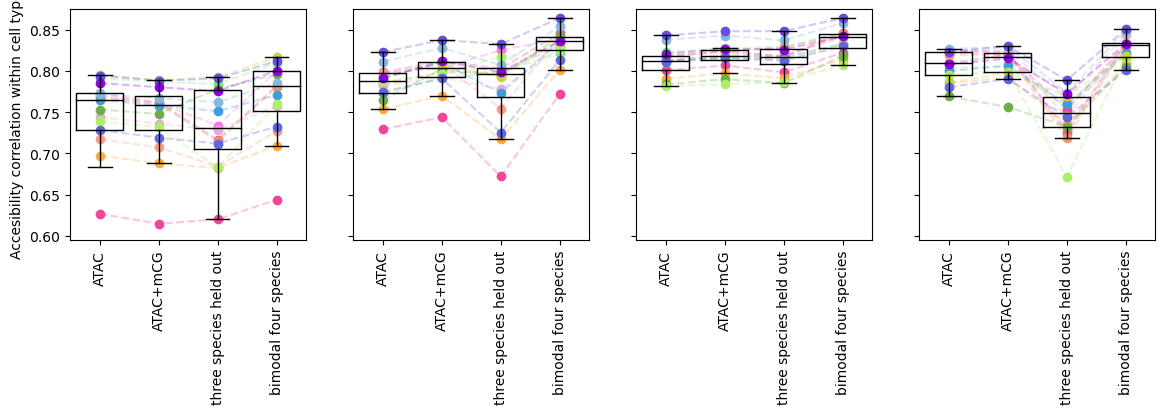

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(3.5*4,3), sharey=True)
axs = axs.flatten()
first =True
for specie, ax in zip(species_list, axs):
    params = params_dict[specie]

    # multiome
    model_name = params['multiome']
    test_acc = f"/home/earmand/projects/basenji/testing/loop_test/{model_name}_model_{model_name}_predict/acc.txt"
    corr_vals_multiome, test_idx_multiome = get_acc_and_idxs(test_acc, specie, 1)
    idxed_corr_multiome = {idx : corr for corr, idx in zip(corr_vals_multiome, test_idx_multiome)}
    plot_color_multiome = [colors[name_conversion[i]] for i in test_idx_multiome]
    
    # bimodal
    
    model_name = params['bimodal']
    test_acc = f"/home/earmand/projects/basenji/testing/loop_test/{model_name}_model_{model_name}_predict/acc.txt"
    # if specie == 'human':
    #     test_acc = f"/home/earmand/projects/basenji/testing/loop_test/{model_name}_model_{model_name}_predict_bak/acc.txt"
        
    corr_vals_bimodal, test_idx_bimodal = get_acc_and_idxs(test_acc, specie, 17)
    idxed_corr_bimodal = {idx : corr for corr, idx in zip(corr_vals_bimodal, test_idx_bimodal)}
    plot_color_bimodal = [colors[name_conversion[i]] for i in test_idx_bimodal]
    
    # four species
    model_name = params['four_species']
    test_acc = model_name+"/acc.txt"
    corr_vals_four_species, test_idx_four_species = get_acc_and_idxs(test_acc, specie, 17)
    idxed_corr_four_species = {idx : corr for corr, idx in zip(corr_vals_four_species, test_idx_four_species)}
    plot_color_four_species = [colors[name_conversion[i]] for i in test_idx_four_species]
    
    # get accuracy from held out predcitions
    held_outs = params['held_outs']
    held_out_corr = []
    held_out_idx = []
    for out in held_outs:
        # !ls $out
        out_corr = !cut -f2 {out}/acc.txt
        out_idx = !cut -f4 {out}/acc.txt
        out_corr = [float(i) for i in out_corr[17:]]
        out_idx = [i.split('_' + specie +'_')[0] for i in out_idx[17:]]
        held_out_corr.append(out_corr)
        held_out_idx.append(out_idx)
    min_test_head = pd.DataFrame(held_out_corr).sum(axis=1).argmin()
    min_idx = held_out_idx[min_test_head]
    min_corr = held_out_corr[min_test_head]
    min_out_spec[specie] = min_test_head
    idxed_min_corr = {idx : corr for corr, idx in zip(min_corr, min_idx)}
    plot_color_min = [colors[name_conversion[i]] for i in min_idx]

    # plot
    
    # fig, ax = plt.subplots(figsize=(3.5,4))
    box_plots = ax.boxplot([corr_vals_multiome, corr_vals_bimodal, held_out_corr[min_test_head], corr_vals_four_species],
                           widths=[.8]*4, showfliers=False)
    for median in box_plots['medians']:
        median.set_color('black')
    for idx in idxed_corr_four_species.keys():
        ax.plot([1, 2, 3, 4], [idxed_corr_multiome[idx],
                            idxed_corr_bimodal[idx], 
                            idxed_min_corr[idx],
                            idxed_corr_four_species[idx]],
                '--',
                c=colors[name_conversion[idx]], alpha=.3, zorder=0)
        ax.scatter([1, 2, 3, 4],
                   [idxed_corr_multiome[idx],
                        idxed_corr_bimodal[idx], 
                        idxed_min_corr[idx],
                        idxed_corr_four_species[idx]],
                    c=colors[name_conversion[idx]], alpha=1, zorder=1)
    
    # ax.scatter(np.zeros(len(corr_vals)) + 1, corr_vals, c= plot_color, alpha=1, zorder=1)
    # ax.scatter(np.zeros(len(corr_vals_bimodal)) + 2, corr_vals_bimodal, c= plot_color_4, alpha=1, zorder=1)
    # ax.scatter(np.zeros(len(corr_vals_4)) + 3, corr_vals_4, c= plot_color_4, alpha=1, zorder=1)
    if first:
        ax.set_ylabel('Accesibility correlation within cell type')
        first=False
    ax.set_ylim(.595, .875)
    ax.set_xticks([1, 2, 3, 4], ['ATAC\n only',
                           'ATAC+mCG',
                              'three \nspecies \nheld out',
                           'bimodal \n four \nspecies', ])
    ax.set_xticklabels(['ATAC',
                           'ATAC+mCG',
                              'three species held out',
                           'bimodal four species', ], rotation=90)
    
# plt.savefig("./figures/all_species_nn_accuracy.pdf", 
#             transparent=True, bbox_inches='tight',
#             dpi=400)

In [11]:
import seaborn as sns

In [12]:
def read_records(path_to_outs, indexes=np.arange(16,32)):
    """
    inputs:
        path_to_outs : a path to the output directory
        indexes : the predictions to collect

    """
    pred_vals = []
    true_vals = []
    for id in indexes:
        dat_pred = pd.read_csv(path_to_outs + f'peak_outs/preds_t{id}.bedgraph', sep='\t', header=None)
        dat_true = pd.read_csv(path_to_outs + f'peak_outs/targets_t{id}.bedgraph', sep='\t', header=None)

        pred_vals.append(dat_pred.groupby(3)[8].mean().rename(f'record_{id}'))
        true_vals.append(dat_true.groupby(3)[8].mean().rename(f'record_{id}'))
    records_pred = pd.concat(pred_vals, axis=1)
    records_true = pd.concat(true_vals, axis=1)
    
    return records_pred, records_true

In [13]:
from scipy.stats import spearmanr

In [14]:
species_list

['human', 'macaque', 'marmoset', 'mouse']

In [15]:
species_hue ={'human' : '#71B894',
             'macaque' : '#6684AA',
             'marmoset' : '#BBBF41',
             'mouse' : '#B37481'}

In [16]:
min_out_spec

{'human': 2, 'macaque': 0, 'marmoset': 0, 'mouse': 0}

In [17]:
# max_dist_idx = {'human' : 'mouse', 'marmoset' : 'mouse', 

Text(1013.7137681159421, 0.5, 'spearman correlation across cell types')

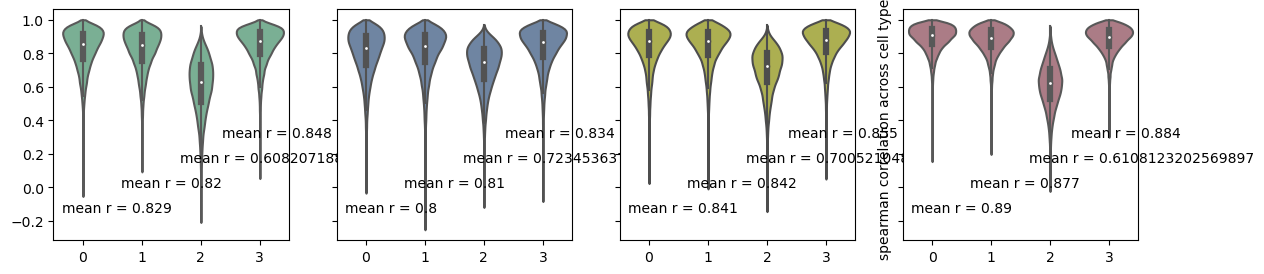

In [18]:
fig, axs = plt.subplots(1, 4, figsize=(3.5*4,3), sharey=True)
axs = axs.flatten()
first =True
for specie, ax in zip(species_list, axs):
    
    params = params_dict[specie]

    # multiome
    model_name = params['multiome']
    test_acc = f"/home/earmand/projects/basenji/testing/loop_test/{model_name}_model_{model_name}_predict/"

    records_pred, records_true = read_records(test_acc, indexes=np.arange(1, 16))

    corrs_multiome = []
    for idx in records_true.index:
        corr_s, _ = spearmanr(records_pred.loc[idx].values, 
                              records_true.loc[idx].values,
                              nan_policy='omit')
        corrs_multiome.append(corr_s)
    
    model_name = params['bimodal']
    test_acc = f"/home/earmand/projects/basenji/testing/loop_test/{model_name}_model_{model_name}_predict/"

    corrs_bimodal = []
    records_pred, records_true = read_records(test_acc)
    for idx in records_true.index:
        corr_s, _ = spearmanr(records_pred.loc[idx].values, 
                              records_true.loc[idx].values,
                              nan_policy='omit')
        corrs_bimodal.append(corr_s)
    
   

    test_acc = params['held_outs'][min_out_spec[specie]] + '/'
    corrs_unseen = []
    records_pred, records_true = read_records(test_acc)
    for idx in records_true.index:
        corr_s, _ = spearmanr(records_pred.loc[idx].values, 
                              records_true.loc[idx].values,
                              nan_policy='omit')
        corrs_unseen.append(corr_s)
    
    
    model_name = params['four_species']
    test_acc = model_name+"/"
    corrs_four_species = []
    records_pred, records_true = read_records(test_acc)
    for idx in records_true.index:
        corr_s, _ = spearmanr(records_pred.loc[idx].values, 
                              records_true.loc[idx].values,
                              nan_policy='omit')
        corrs_four_species.append(corr_s)

    plt.savefig("./figures/all_species_nn_xcell_accuracy.pdf", 
            transparent=True,
            bbox_inches='tight',
            dpi=400)
    
    sns.violinplot([corrs_multiome, corrs_bimodal, corrs_unseen, corrs_four_species], palette=[species_hue[specie]]*4, cut=0, ax=ax)
    # ax.set_xticks([0,1, 2], ['atac_model', 'bimodal model', 'four species marmoset'])
    # plt.title('correlation across cell types\nHuman test set')
    ax.text(-.35, -.15, "mean r = {:.3}".format(np.mean(corrs_multiome)))
    ax.text(.65, 0, "mean r = {:.3}".format(np.mean(corrs_bimodal)))
    ax.text(1.65, .15, "mean r = {:3}".format(np.mean(corrs_unseen)))
    ax.text(2.35, .3, "mean r = {:.3}".format(np.mean(corrs_four_species)))
    

ax.set_ylabel('spearman correlation across cell types')
# plt.savefig("./figures/all_species_nn_xcell_accuracy.pdf", 
#             transparent=True,
#             bbox_inches='tight',
#             dpi=400)


In [28]:
species_list

['human', 'macaque', 'marmoset', 'mouse']

In [34]:
# fig, axs = plt.subplots(1, 4, figsize=(3.5*4,3), sharey=True)
# axs = axs.flatten()
first =True

cross_cell_held_out = []
cross_cell_acc = []


for specie in species_list:

    params = params_dict[specie]
    


    held_outs = params['held_outs']
    held_out_corr = []
    held_out_idx = []
    for out in held_outs:
        # !ls $out
        out_corr = !cut -f2 {out}/acc.txt
        out_idx = !cut -f4 {out}/acc.txt
        out_corr = [float(i) for i in out_corr[17:]]
        out_idx = [i.split('_' + specie +'_')[0] for i in out_idx[17:]]
        held_out_corr.append(out_corr)
        held_out_idx.append(out_idx)
    min_test_head = pd.DataFrame(held_out_corr).sum(axis=1).argmin()
    min_idx = held_out_idx[min_test_head]
    min_corr = held_out_corr[min_test_head]
    min_out_spec[specie] = min_test_head
    idxed_min_corr = {idx : corr for corr, idx in zip(min_corr, min_idx)}
    plot_color_min = [colors[name_conversion[i]] for i in min_idx]

    cross_cell_acc.append(idxed_min_corr)
    
    test_acc = params['held_outs'][min_out_spec[specie]] + '/'
    corrs_unseen = []
    records_pred, records_true = read_records(test_acc)
    for idx in records_true.index:
        corr_s, _ = spearmanr(records_pred.loc[idx].values, 
                              records_true.loc[idx].values,
                              nan_policy='omit')
        corrs_unseen.append(corr_s)
    
    cross_cell_held_out.append(corrs_unseen)


    # plt.savefig("./figures/all_species_nn_xcell_accuracy.pdf", 
    #         transparent=True,
    #         bbox_inches='tight',
    #         dpi=400)
    
#     sns.violinplot([corrs_multiome, corrs_bimodal, corrs_unseen, corrs_four_species], palette=[species_hue[specie]]*4, cut=0, ax=ax)
#     # ax.set_xticks([0,1, 2], ['atac_model', 'bimodal model', 'four species marmoset'])
#     # plt.title('correlation across cell types\nHuman test set')
#     ax.text(-.35, -.15, "mean r = {:.3}".format(np.mean(corrs_multiome)))
#     ax.text(.65, 0, "mean r = {:.3}".format(np.mean(corrs_bimodal)))
#     ax.text(1.65, .15, "mean r = {:3}".format(np.mean(corrs_unseen)))
#     ax.text(2.35, .3, "mean r = {:.3}".format(np.mean(corrs_four_species)))
    

# ax.set_ylabel('spearman correlation across cell types')
# plt.savefig("./figures/all_species_nn_xcell_accuracy.pdf", 
#             transparent=True,
#             bbox_inches='tight',
#             dpi=400)


In [ ]:
[[v for v in d.values()] for d in dicts_list]

In [ ]:
    for idx in idxed_corr_four_species.keys():
        ax.plot([1, 2, 3, 4], [idxed_corr_multiome[idx],
                            idxed_corr_bimodal[idx], 
                            idxed_min_corr[idx],
                            idxed_corr_four_species[idx]],
                '--',
                c=colors[name_conversion[idx]], alpha=.3, zorder=0)

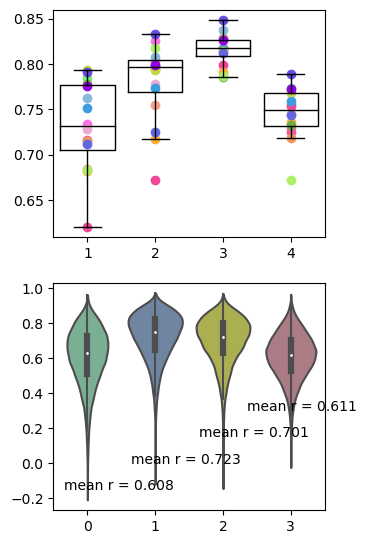

In [57]:
fig, axs = plt.subplots(2, 1, figsize=(3.5, 6.5), sharex=False)
bx = axs[0].boxplot([[v for v in d.values()] for d in cross_cell_acc], widths=[.8]*4, showfliers=False)
for median in bx['medians']:
    median.set_color('black')
for idx in cross_cell_acc[0]:
    x = [1, 2, 3, 4]
    y = [d[idx] for d in cross_cell_acc]
    c=colors[name_conversion[idx]]
    axs[0].scatter(x, y, c=c)



sns.violinplot(cross_cell_held_out, palette = [species_hue[specie] for specie in species_list], cut=0, ax=axs[1])

axs[1].text(-.35, -.15, "mean r = {:.3}".format(np.mean(cross_cell_held_out[0])))
axs[1].text(.65, 0, "mean r = {:.3}".format(np.mean(cross_cell_held_out[1])))
axs[1].text(1.65, .15, "mean r = {:.3}".format(np.mean(cross_cell_held_out[2])))
axs[1].text(2.35, .3, "mean r = {:.3}".format(np.mean(cross_cell_held_out[3])))
plt.savefig('./figures/unseen_model.pdf', dpi=400, bbox_inches='tight')

In [19]:
!mkdir -p /home/earmand/projects/basenji/testing/loop_test/marmoset_macaque_mouse_model_mouse_head__predict/peak_outs

In [20]:
!mkdir -p /home/earmand/projects/basenji/testing/loop_test/hhuman_macaque_marmoset_model_human_head_mouse_all_mod_predict/peak_outs

In [21]:
!ls /home/earmand/projects/basenji/testing/loop_test/human_macaque_mouse_9_11_model_human_head_marmoset_mcg_atac_predict/

acc.txt  bedgraph  peak_outs  pr  preds.h5  roc  scatter  targets.h5  violin


In [22]:
!mv -t /home/earmand/projects/basenji/testing/loop_test/marmoset_macaque_mouse_model_mouse_head__predict/peak_outs/ /home/earmand/projects/basenji/testing/loop_test/marmoset_macaque_mouse_model_mouse_head__predict/targets_t*

mv: cannot stat '/home/earmand/projects/basenji/testing/loop_test/marmoset_macaque_mouse_model_mouse_head__predict/targets_t*': No such file or directory


NameError: name 'ttest_rel' is not defined

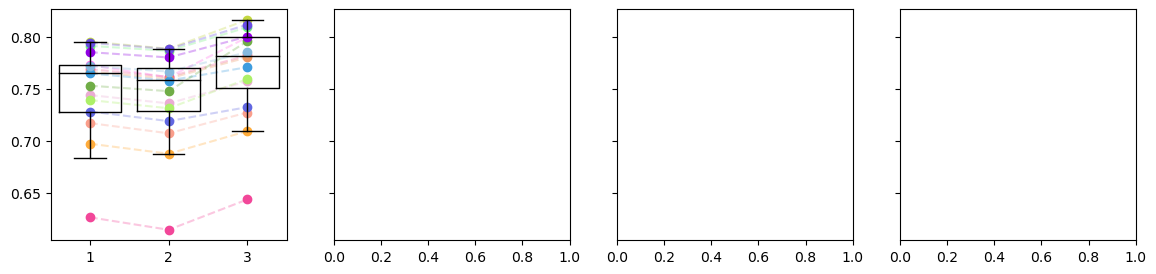

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(3.5*4,3), sharey=True)
axs = axs.flatten()
first =True
for specie, ax in zip(species_list, axs):
    params = params_dict[specie]

    # multiome
    model_name = params['multiome']
    test_acc = f"/home/earmand/projects/basenji/testing/loop_test/{model_name}_model_{model_name}_predict/acc.txt"
    corr_vals_multiome, test_idx_multiome = get_acc_and_idxs(test_acc, specie, 1)
    idxed_corr_multiome = {idx : corr for corr, idx in zip(corr_vals_multiome, test_idx_multiome)}
    plot_color_multiome = [colors[name_conversion[i]] for i in test_idx_multiome]
    
    # bimodal
    
    model_name = params['bimodal']
    test_acc = f"/home/earmand/projects/basenji/testing/loop_test/{model_name}_model_{model_name}_predict/acc.txt"
    # if specie == 'human':
    #     test_acc = f"/home/earmand/projects/basenji/testing/loop_test/{model_name}_model_{model_name}_predict_bak/acc.txt"
        
    corr_vals_bimodal, test_idx_bimodal = get_acc_and_idxs(test_acc, specie, 17)
    idxed_corr_bimodal = {idx : corr for corr, idx in zip(corr_vals_bimodal, test_idx_bimodal)}
    plot_color_bimodal = [colors[name_conversion[i]] for i in test_idx_bimodal]
    
    # four species
    model_name = params['four_species']
    test_acc = model_name+"/acc.txt"
    corr_vals_four_species, test_idx_four_species = get_acc_and_idxs(test_acc, specie, 17)
    idxed_corr_four_species = {idx : corr for corr, idx in zip(corr_vals_four_species, test_idx_four_species)}
    plot_color_four_species = [colors[name_conversion[i]] for i in test_idx_four_species]
    
    # get accuracy from held out predcitions
    held_outs = params['held_outs']
    held_out_corr = []
    held_out_idx = []
    for out in held_outs:
        # !ls $out
        out_corr = !cut -f2 {out}/acc.txt
        out_idx = !cut -f4 {out}/acc.txt
        out_corr = [float(i) for i in out_corr[17:]]
        out_idx = [i.split('_' + specie +'_')[0] for i in out_idx[17:]]
        held_out_corr.append(out_corr)
        held_out_idx.append(out_idx)
    min_test_head = pd.DataFrame(held_out_corr).sum(axis=1).argmin()
    min_idx = held_out_idx[min_test_head]
    min_corr = held_out_corr[min_test_head]
    
    idxed_min_corr = {idx : corr for corr, idx in zip(min_corr, min_idx)}
    plot_color_min = [colors[name_conversion[i]] for i in min_idx]

    # plot


    # fig, ax = plt.subplots(figsize=(3.5,4))
    box_plots = ax.boxplot([corr_vals_multiome, corr_vals_bimodal, corr_vals_four_species],
                           widths=[.8]*3, showfliers=False)
    for median in box_plots['medians']:
        median.set_color('black')
    for idx in idxed_corr_four_species.keys():
        ax.plot([1, 2, 3,], [idxed_corr_multiome[idx],
                            idxed_corr_bimodal[idx], 
                            # idxed_min_corr[idx],
                            idxed_corr_four_species[idx]],
                '--',
                c=colors[name_conversion[idx]], alpha=.3, zorder=0)
        ax.scatter([1, 2, 3],
                   [idxed_corr_multiome[idx],
                        idxed_corr_bimodal[idx], 
                        # idxed_min_corr[idx],
                        idxed_corr_four_species[idx]],
                    c=colors[name_conversion[idx]], alpha=1, zorder=1)
    test_1 = ttest_rel([idxed_corr_bimodal[idx] for idx in idxed_corr_four_species.keys()], 
              [idxed_corr_multiome[idx] for idx in idxed_corr_four_species.keys()], 
                      alternative='greater')[1]
    test_2 = ttest_rel([idxed_corr_four_species[idx] for idx in idxed_corr_four_species.keys()], 
              [idxed_corr_bimodal[idx] for idx in idxed_corr_four_species.keys()],
                      alternative='greater')[1]

    ax.text(1.5, 1, "{:.2}".format(test_1))
    ax.text(2.5, 1, "{:.2}".format(test_2))
    
    if first:
        ax.set_ylabel('Accesibility correlation within cell type')
        first=False
    ax.set_ylim(.595, .92)
    ax.set_xticks([1, 2, 3], ['ATAC\n only',
                           'ATAC+mCG',
                              # 'three \nspecies \nheld out',
                           'bimodal \n four \nspecies', ])
    ax.set_xticklabels(['ATAC',
                           'ATAC+mCG',
                              # 'three species held out',
                           'bimodal four species', ], rotation=90)
    
plt.savefig("./figures/all_species_nn_accuracy_three.pdf", 
            transparent=True, bbox_inches='tight',
            dpi=400)

In [ ]:
plt.savefig("./figures/all_species_nn_xcell_accuracy.pdf", 
            transparent=True,
            bbox_inches='tight',
            dpi=400)

In [ ]:
  # sns.violinplot([corrs_multiome, corrs_bimodal, corrs_four_species], cut=0, ax=ax)
  #   ax.set_xticks([0,1, 2], ['atac_model', 'bimodal model', 'four species marmoset'])
  #   # plt.title('correlation across cell types\nHuman test set')
  #   ax.set_ylabel('spearman correlation across cell types')
  #   ax.text(-.25, .25, "mean corr = {}".format(np.mean(corrs_multiome)))
  #   ax.text(.75, .25, "mean corr = {}".format(np.mean(corrs_bimodal)))
  #   ax.text(1.75, .25, "mean corr = {}".format(np.mean(corrs_four_species)))

In [ ]:
    from scipy.stats import ttest_rel
    

In [ ]:
?ttest_rel